**TASK-3:- IRIS FLOWER CLASSIFICATION BY MITUL PRAJAPATI**

**IMPORTING LIBRARIES**

In [432]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

**IMPORTING DATA**

In [433]:
df=pd.read_csv("D:\MITUL\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis (EDA)**

In [434]:
df.shape

(150, 5)

In [435]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [437]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**THE DATA IS ALREADY CLEAN, IT DOESN'T CONTAIN ANY NULL VALUE.**

**TRANSFORMING CATEGORICAL DATA INTO  NUMERICAL**

In [438]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [439]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [440]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

**VISUALIZING DATA USING HEATMAP**

<Axes: >

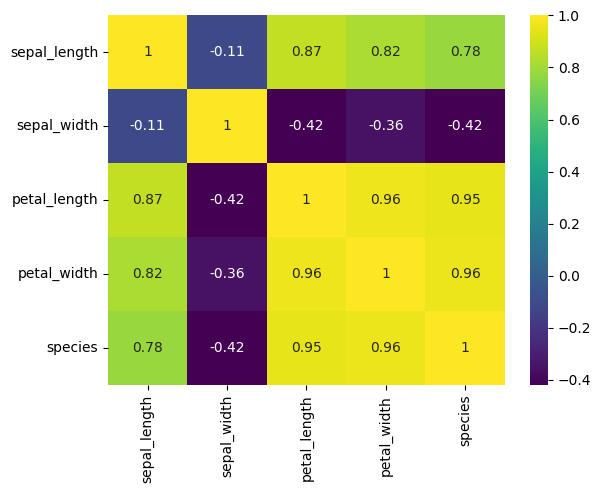

In [441]:
sb.heatmap(df.corr(),annot=True,cmap='viridis')

**petal_length	AND petal_width ARE HIGHLY CORRELATED WRT SPECIES, AND sepal_width IS LEAST COORRELATED WRT SPECIES**

In [442]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [443]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

**SPLITTING DATA INTO TRANING AND TESTING DATASET**

In [444]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [445]:
X_train.shape

(120, 4)

In [446]:
y_train.shape

(120,)

In [447]:
X_test.shape

(30, 4)

In [448]:
y_test.shape

(30,)

**FITTING TRANING DATA**

In [449]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

**KNeighborsClassifier is a classification algorithm that works by finding the 'k' closest training examples in the feature space to a given test example. The class of the test example is then determined by the majority class among these 'k' nearest neighbors.**

**PREDICTING DATA**

In [450]:
predict=knn.predict(X_test)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [451]:
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: species, dtype: int32

**CHECKING ERROR AND ACCURACY OF PREDICTED DATA WRT Y_TEST**

In [452]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(predict,y_test)
mse=mean_squared_error(predict,y_test)
print('mae:-',mae,'mse:-',mse)

mae:- 0.0 mse:- 0.0


In [453]:
from sklearn.metrics import accuracy_score
accuracy_score(predict,y_test)

1.0

**CONCLUSION:-The KNeighborsClassifier achieved perfect classification on the Iris dataset, evidenced by an accuracy of 100% and zero error metrics (MAE and MSE). This indicates that the model accurately captured the underlying patterns**